# HOG (Histogram of Oriented Gradient)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Dataset

Probably you know the famous MNIST numbers dataset, for this practice you will use an upgraded version of this, the Zalando [Fashion Mnist](https://github.com/zalandoresearch/fashion-mnist) dataset.

To ease its download you can use the next commands (uncomment them):

In [ ]:
#!git clone https://github.com/zalandoresearch/fashion-mnist.git

In [ ]:
#!mv -v fashion-mnist/* .

In [ ]:
# Execute the next command on your terminal to delete the dataset folder, which should be empty.
#!rm -R fashion-mnist/

In [ ]:
#!ls

In [2]:
import utils.mnist_reader as mnist_reader

In [3]:
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [4]:
X_train.shape

(60000, 784)

In [5]:
image = X_train[0].reshape((28, 28))

In [7]:
np.unique(image, return_counts=True)

(array([  0,   1,   2,   3,   4,   6,   7,  10,  12,  13,  15,  18,  23,
         29,  35,  36,  40,  41,  44,  48,  52,  54,  55,  56,  57,  58,
         61,  62,  64,  65,  66,  67,  69,  72,  73,  74,  75,  77,  80,
         82,  88,  92,  98,  99, 102, 106, 107, 109, 115, 117, 119, 121,
        122, 123, 127, 130, 134, 136, 141, 144, 145, 146, 150, 154, 155,
        156, 159, 161, 163, 164, 166, 167, 168, 169, 170, 171, 172, 173,
        175, 176, 177, 178, 179, 180, 181, 182, 183, 185, 186, 187, 188,
        189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 202,
        203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,
        216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228,
        229, 230, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242,
        243, 244, 245, 246, 248, 249, 250, 255], dtype=uint8),
 array([351,  11,   2,   6,   4,   3,   1,   1,   2,   1,   1,   1,   2,
          1,   1,   1,   1,   1,   2,   1,   1,   1,   1,   1

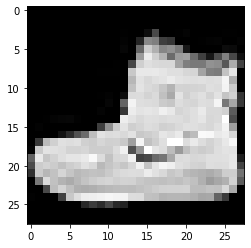

In [6]:
plt.imshow(image, cmap="gray")

## Libraries

For this task, we are going to use an alternative computer vision library named Scikit-image (also named skimage). In next section we are going to do a comparison between both libraries.

To install it, we are going to use the next command:

In [ ]:
# !conda install --yes scikit-image==0.18.1

### [scikit-image](https://scikit-image.org/) vs [OpenCV](https://opencv.org/)

Skimage library is entirely implemented using python and Cython, on the other hand OpenCV is implemented uniquely with C++ and C.

Next images show you the programming languages usage in each library. Python and Java are used in OpenCV in the bindings of both languages, there are any functionality implemented using those languages.


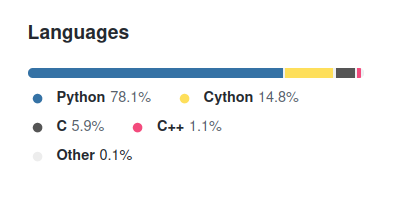

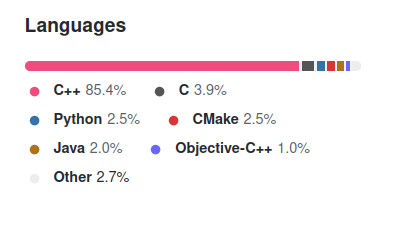



In this week class, we are interested working with low level HOG descriptions implementation, which is not possible using OpenCV.

## Algorithm

Next link contains the algorithm implementation details: https://learnopencv.com/histogram-of-oriented-gradients/

OpenCV usage example: https://carlosjuliopardoblog.wordpress.com/2018/06/28/deteccion-de-peatones-con-python-y-opencv-hog-svm/

Let's see how the algorithm works to obtain the HOG descriptors. At next link you can see how to use the skimage library to compute these image descriptors:
https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html#sphx-glr-auto-examples-features-detection-plot-hog-py

Next, you will see how to apply the algorithm with the images of the dataset we are going to use.
First step is to load the libraries:

In [8]:
from skimage.feature import hog
from skimage import data, exposure

Remember that HOG algorithm divide the image in $x \times y$ pixels cells. The dataset images has a shape of $28 \times 28$ pixels, the fact that images are such small complicate that cells division. With this shape, splitting the images by $8 \times 8$ cells we will only have $3 \times 3$ cells.

The easiest way to solve that problem is to reshape the images to a higher shape. So, we are going to multiply the images shape by 3. That way we can compute and visualize HOG descriptors nicely. If we don't do that the computed descriptors would not have too much sense. 

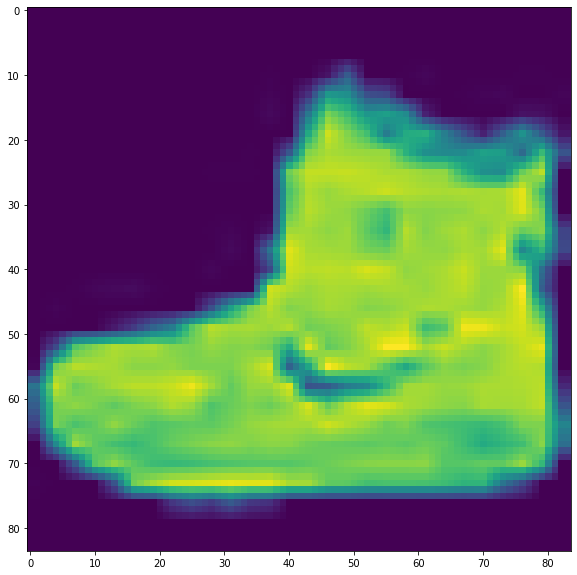

In [19]:
im_input_hog = cv2.resize(image, dsize=None, fx=3, fy=3)
im_input_hog.shape
plt.imshow(im_input_hog);

With this new shape, we can compute $10 \times 10$ cells of $8 \times 8$ pixels onto the image correctly. The code to perform that is the following:

Text(0.5, 1.0, 'Histogram of Oriented Gradients')

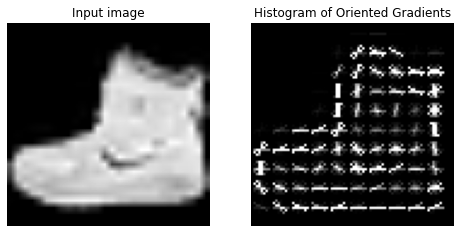

In [20]:
fd, hog_image = hog(im_input_hog, orientations=9, pixels_per_cell=(8, 8),
                    feature_vector=False,
                    cells_per_block=(1, 1), visualize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(im_input_hog, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')

Let's consult the function definition:
- https://scikit-image.org/docs/dev/api/skimage.feature.html?highlight=hog

In [21]:
fd.shape

(10, 10, 1, 1, 9)

In [22]:
fd.squeeze().shape

(10, 10, 9)

In [23]:
fd.squeeze()[0,0, :]

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
fd.squeeze()[5,5, :]

array([0.05953277, 0.16576118, 0.37205589, 0.37205589, 0.37205589,
       0.37205589, 0.37205589, 0.37205589, 0.37205589])

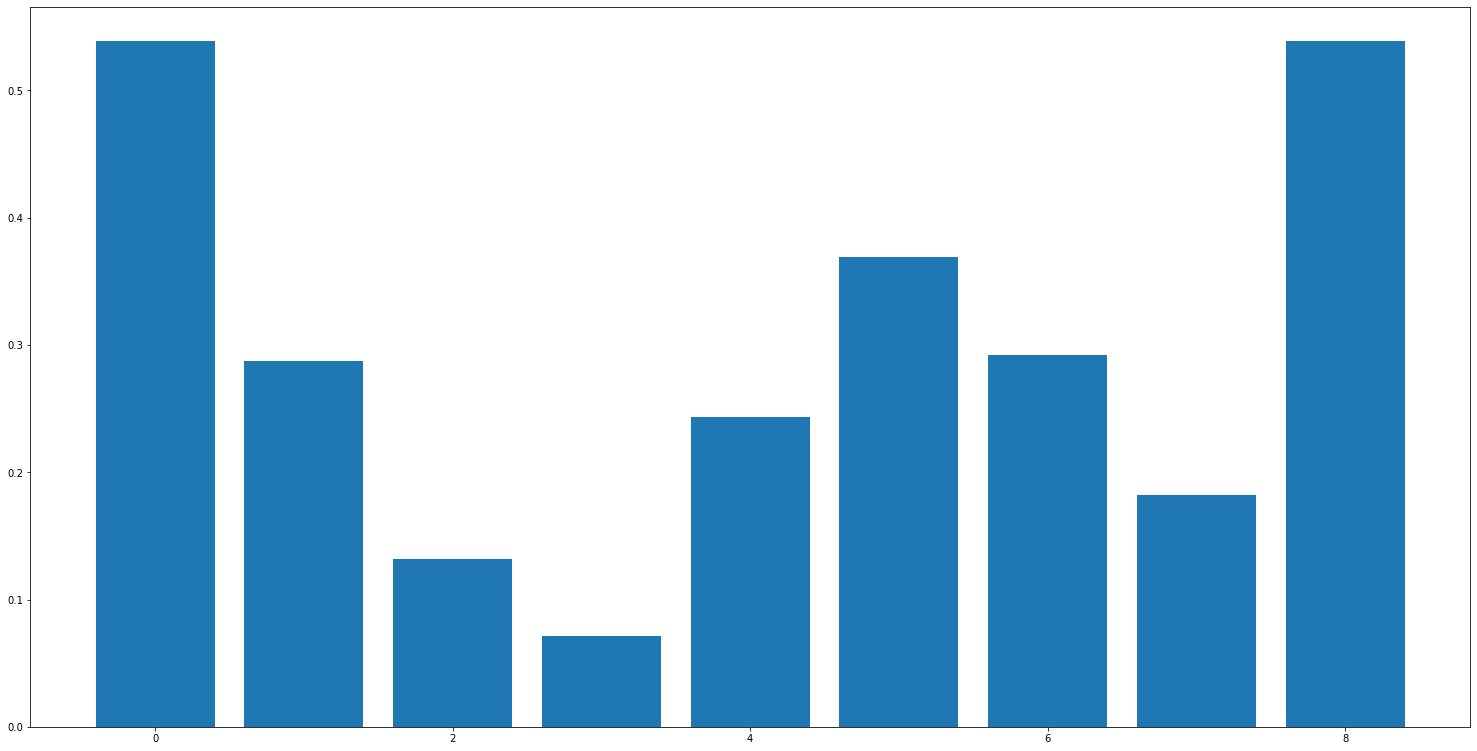

In [25]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
values = np.arange(9)
histogram = fd.squeeze()[4,5, :]
ax.bar(values,histogram);

In [26]:
histograms = fd.reshape(100,9).shape

Text(0.5, 1.0, 'Histogram of Oriented Gradients')

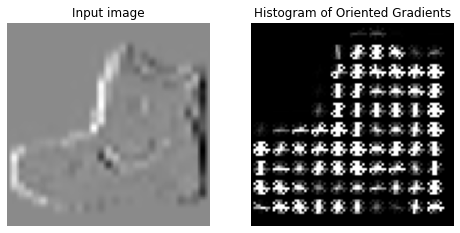

In [27]:
im_input = im_input_hog.copy()
# cv2.CV_32F
im_input = cv2.Sobel(im_input, cv2.CV_32F, 1, 0)

fd, hog_image = hog(im_input, orientations=9, pixels_per_cell=(8, 8),
                    feature_vector=False,
                    cells_per_block=(1, 1), visualize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(im_input, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')

In [1]:
im_input = im_input_hog.copy()
# cv2.CV_32F
im_input = cv2.Sobel(im_input, cv2.CV_32F, 0, 1)

fd, hog_image = hog(im_input, orientations=9, pixels_per_cell=(8, 8),
                    feature_vector=False,
                    cells_per_block=(1, 1), visualize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(im_input, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')

NameError: name 'im_input_hog' is not defined

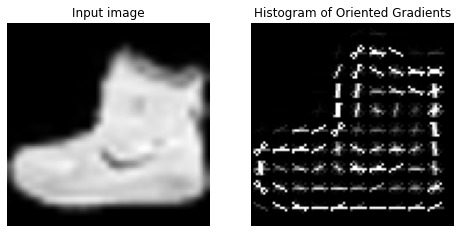

In [28]:
im_input = im_input_hog.copy()
# cv2.CV_32F
im_input = cv2.GaussianBlur(im_input, (3, 3), sigmaX=50)

fd, hog_image = hog(im_input, orientations=9, pixels_per_cell=(8, 8),
                    feature_vector=False,
                    cells_per_block=(1, 1), visualize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(im_input, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients');

In [ ]:
im_input = im_input_hog.copy()
# cv2.CV_32F
im_input = cv2.medianBlur(im_input, 7)

fd, hog_image = hog(im_input, orientations=9, pixels_per_cell=(8, 8),
                    feature_vector=False,
                    cells_per_block=(1, 1), visualize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(im_input, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients');

## Tasks
* Analyse how the computed HOG descriptors changes after aply a filter onto the image. How this effect could be useful?


Read step 6, where talks about how to solve the problems of multiple detection of the same object.

https://www.pyimagesearch.com/2014/11/10/histogram-oriented-gradients-object-detection/